In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn import preprocessing
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib as mpl
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 用附件1中的数据聚类

In [3]:
df = pd.read_csv('附件1处理后数据.csv',engine='python')
df=df[["newprice","tradeTime-licenseDate","tradeTime-registerDate","displacement","mileage","tradeTime-feature13","price"]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 7 columns):
newprice                  29998 non-null float64
tradeTime-licenseDate     29998 non-null float64
tradeTime-registerDate    29998 non-null float64
displacement              29998 non-null float64
mileage                   29998 non-null float64
tradeTime-feature13       29998 non-null float64
price                     29998 non-null float64
dtypes: float64(7)
memory usage: 1.6 MB


In [5]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)
y_pred=kmeans.predict(df)

In [6]:
df.head(3)

newprice  tradeTime-licenseDate  tradeTime-registerDate  displacement  \
0      6.88                  178.0                   186.0           1.5   
1     11.98                  222.0                   238.0           1.2   
2     12.78                  694.0                   698.0           1.6   

   mileage  tradeTime-feature13  price  
0     4.01                45.00   4.24  
1     8.60                57.00   7.38  
2    15.56               155.95   1.00

[18.41369333  8.30311243 13.06144037]


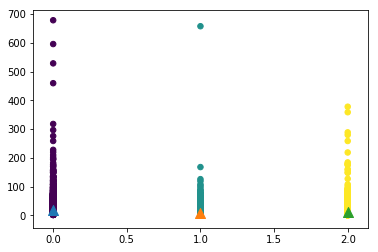

In [7]:
print(kmeans.cluster_centers_[:,6])
plt.scatter(y_pred,df["price"],c=y_pred,s=30)
plt.scatter(0,kmeans.cluster_centers_[0,6],marker="^",s=100)
plt.scatter(1,kmeans.cluster_centers_[1,6],marker="^",s=100)
plt.scatter(2,kmeans.cluster_centers_[2,6],marker="^",s=100)

[26.29344576 33.39569771 29.36236113]


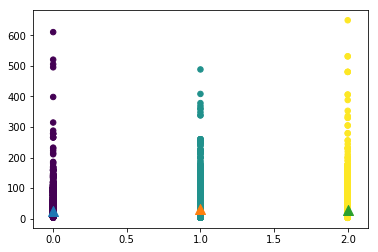

In [8]:
print(kmeans.cluster_centers_[:,0])
plt.scatter(y_pred,df["newprice"],c=y_pred,s=30)
plt.scatter(0,kmeans.cluster_centers_[0,0],marker="^",s=100)
plt.scatter(1,kmeans.cluster_centers_[1,0],marker="^",s=100)
plt.scatter(2,kmeans.cluster_centers_[2,0],marker="^",s=100)

In [9]:
kmeans2=KMeans(n_clusters=2)
kmeans2.fit(df)
y_pred2=kmeans2.predict(df)

[17.16701289 10.04497155]


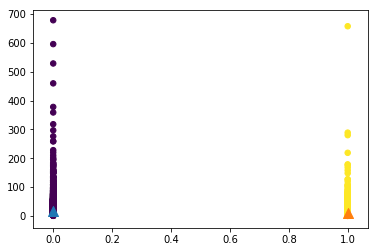

In [10]:
print(kmeans2.cluster_centers_[:,6])
plt.scatter(y_pred2,df["price"],c=y_pred2,s=30)
plt.scatter(0,kmeans2.cluster_centers_[0,6],marker="^",s=100)
plt.scatter(1,kmeans2.cluster_centers_[1,6],marker="^",s=100)

In [11]:
kmeans4=KMeans(n_clusters=4)
kmeans4.fit(df)
y_pred4=kmeans4.predict(df)

[14.80266014 11.35322605 19.21670031  7.08921729]


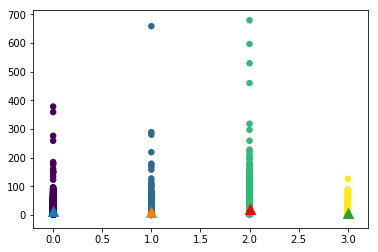

In [12]:
print(kmeans4.cluster_centers_[:,6])
plt.scatter(y_pred4,df["price"],c=y_pred4,s=30)
plt.scatter(0,kmeans4.cluster_centers_[0,6],marker="^",s=100)
plt.scatter(1,kmeans4.cluster_centers_[1,6],marker="^",s=100)
plt.scatter(2,kmeans4.cluster_centers_[2,6],marker="^",s=100,color="r")
plt.scatter(3,kmeans4.cluster_centers_[3,6],marker="^",s=100)

### 用附件4中的数据聚类

In [13]:
df = pd.read_csv('第二问编码后的数据2.csv',engine='python')
df=df[["pushPrice","withdrawDate","newprice","pull_pushTime","update_num","update_T_el","delta_price","price"]]
df.head(3)

pushPrice  withdrawDate  newprice  pull_pushTime  update_num  update_T_el  \
0       3.98             1     15.89              0           0     0.000000   
1       4.50             1      9.28              4           0     0.000000   
2      23.90             1     34.00              4           1     0.043478   

   delta_price  price  
0     0.000000   3.98  
1     0.000000   4.50  
2     0.037657  23.00

In [14]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df)
y_pred=kmeans.predict(df)

------------以下是 pushPrice -----------
[45.60379823 11.52335963]


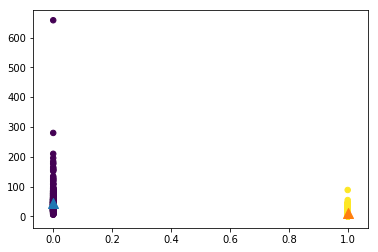

------------以下是 withdrawDate -----------
[0.7982327  0.80012874]


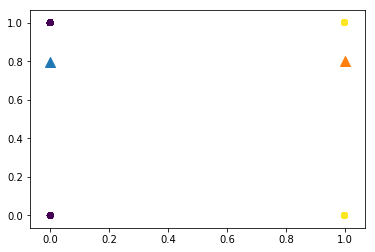

------------以下是 newprice -----------
[101.08354934  23.30100197]


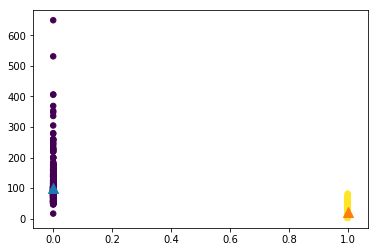

------------以下是 pull_pushTime -----------
[3.49926362 3.12917069]


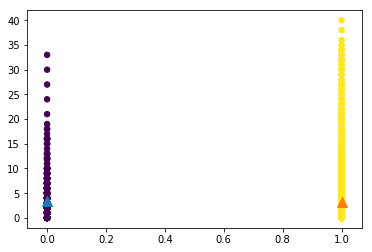

------------以下是 update_num -----------
[0.57142857 0.49726424]


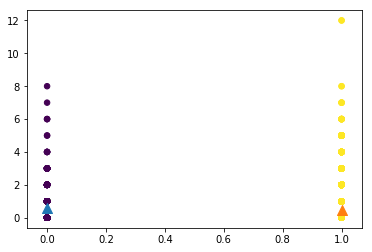

------------以下是 update_T_el -----------
[0.06564695 0.07255529]


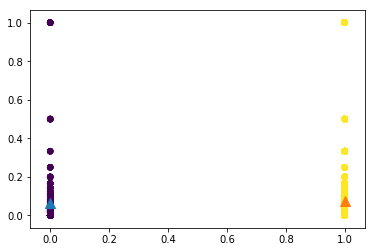

------------以下是 delta_price -----------
[0.00499409 0.01694077]


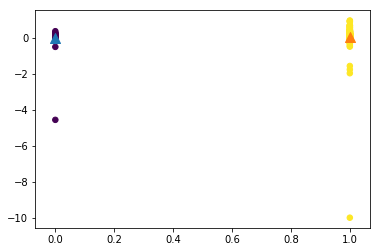

------------以下是 price -----------
[45.25123549 11.32510338]


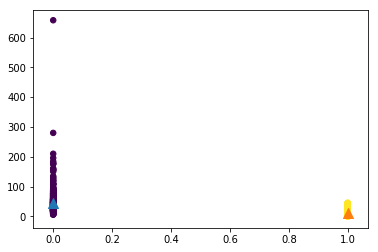

In [15]:
for i in range(df.shape[1]):
    print("------------以下是",df.columns[i],"-----------")
    print(kmeans.cluster_centers_[:,i])
    plt.scatter(y_pred,df.iloc[:,i],c=y_pred,s=30)
    plt.scatter(0,kmeans.cluster_centers_[0,i],marker="^",s=100)
    plt.scatter(1,kmeans.cluster_centers_[1,i],marker="^",s=100)
    plt.ylim=(0,1)
    
    plt.show()
    

In [16]:
location1=[]
location2=[]
for i in range(len(y_pred)):
    if y_pred[i]==0:
        location1.append(i)
    else:
        location2.append(i)
print("location1",len(location1))
print("location2",len(location2))

location1 679
location2 9321


In [17]:
df = pd.read_csv('第二问编码后的数据2.csv',engine='python')
#分别提取两类
df1=pd.DataFrame()
df2=pd.DataFrame()
for i in range(df.shape[0]):
    if i in location1:
        df1=pd.concat([df1,(df.iloc[i,:].T)],axis=1)
    else:
        df2=pd.concat([df2,(df.iloc[i,:].T)],axis=1)
        
df1=df1.T
df2=df2.T
df1=df1.reset_index()
df2=df2.reset_index()


In [18]:
discount1=[] 
for i in range(df1.shape[0]):
    discount1.append((df1.loc[i,"pushPrice"])/(df1.loc[i,"newprice"]))
    
discount2=[] 
for i in range(df2.shape[0]):
    discount2.append((df2.loc[i,"pushPrice"])/(df2.loc[i,"newprice"]))

df1.insert(43, 'discount', discount1)
df2.insert(43, 'discount', discount2)

In [19]:
#计算两类样本的各变量均值
class_compare=pd.DataFrame(columns=["第一类均值","第二类均值"])
for i in range(df1.shape[1]):
    class_compare.loc[df1.columns[i]]=[df1.mean()[i],df2.mean()[i]]

#设置dataframe不以科学计数法打印
pd.set_option('display.float_format', lambda x: '%.5f' % x)

class_compare

第一类均值             第二类均值
index                         5038.85862        4996.63287
brand                         1210.84683        1076.58771
carCode                          0.00000           0.00000
carid                        36497.10604       35915.41069
cityId                        5352.47570        3898.46401
color                         4261.54197        5072.64639
country                          0.00000           0.00000
delta_price                      0.00499           0.01694
displacement                     3.17231           1.85683
feature1                         0.00000           0.00000
feature10                        0.00000           0.00000
feature11                        0.00000           0.00000
feature12-height              1639.21649        1546.34771
feature12-length              4969.41237        4630.95558
feature12-volume       15731541507.02798 13023992633.18635
feature12-width               1927.48159        1812.73662
feature14                    10817.31664       10763.15975
feature2                       911.10162        3288.26210
feature3                     20377.84389       20185.27615
feature5                       374.71134         647.52602
feature6                      6099.87923        7306.11179
feature8                         0.00000           0.00000
feature9                         0.00000           0.00000
gearbox                          0.00000           0.00000
maketype                         0.00000           0.00000
mileage                          8.83390           7.12578
model                            0.15464           0.13767
newprice                       101.08355          23.30100
oiltype                      19526.53756       19532.06963
price                           45.25124          11.32510
pull_pushTime                    3.49926           3.12917
pull_pushTime_days              24.55965          22.02725
pushPrice                       45.60380          11.52336
seatings                         5.08100           5.13507
serial                           0.08325           0.15568
tradeTime-feature13             84.45218          75.51966
tradeTime-licenseDate          316.98675         286.44630
tradeTime-modelyear              6.69373           5.99767
tradeTime-registerDate         346.95729         301.67836
transferCount                    0.76878           0.41069
update_T_el                      0.06565           0.07256
update_num                       0.57143           0.49726
withdrawDate                     0.79823           0.80013
discount                         0.54322           0.49502

In [ ]:
# outputpath = 'E:/Fanny_Python_Files/两类比较.csv'
# class_compare.to_csv(outputpath,sep=',',index=True,header=True)

# #把两类数据输出
# outputpath = 'E:/Fanny_Python_Files/第一类数据.csv'
# df1.to_csv(outputpath,sep=',',index=False,header=True)
# outputpath = 'E:/Fanny_Python_Files/第二类数据.csv'
# df2.to_csv(outputpath,sep=',',index=False,header=True)

### 问题三可视化

In [21]:
df_all = pd.read_csv('第二问编码后的数据2.csv',engine='python')
df=df_all[["pushPrice","withdrawDate","newprice","pull_pushTime","update_num","update_T_el","delta_price","price"]]
df.head(3)

pushPrice  withdrawDate  newprice  pull_pushTime  update_num  update_T_el  \
0    3.98000             1  15.89000              0           0      0.00000   
1    4.50000             1   9.28000              4           0      0.00000   
2   23.90000             1  34.00000              4           1      0.04348   

   delta_price    price  
0      0.00000  3.98000  
1      0.00000  4.50000  
2      0.03766 23.00000

In [22]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(df)
y_pred=kmeans.predict(df)

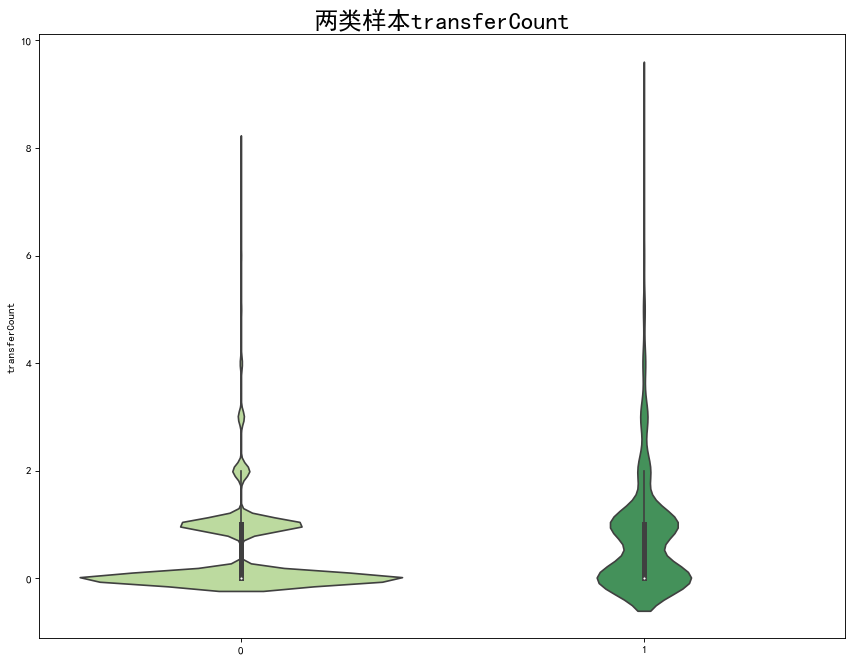

In [23]:
#transferCount有明显差异

plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x=y_pred,y=df_all["transferCount"],palette=sns.color_palette("YlGn",2))

# Decoration
plt.title('两类样本transferCount', fontsize=22)

plt.show()

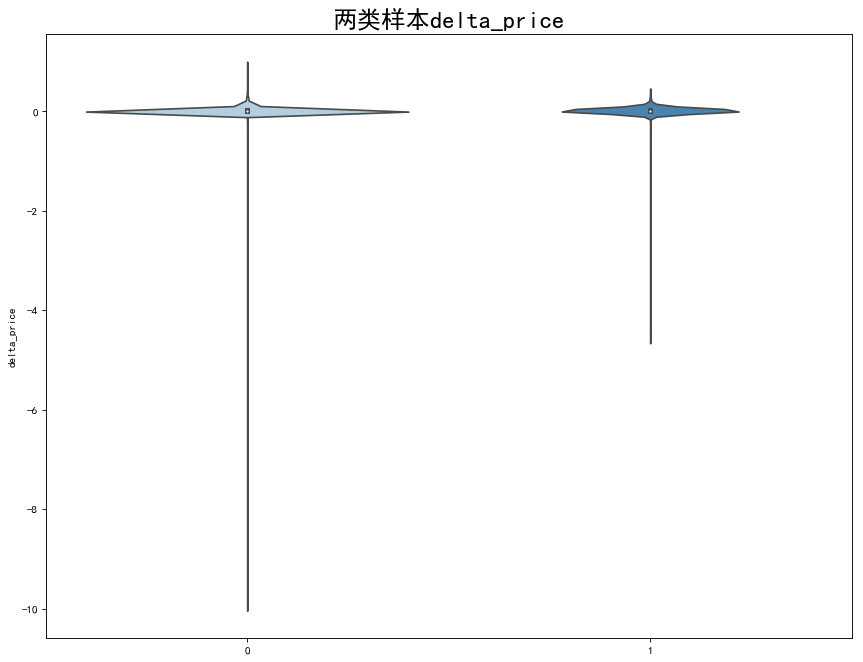

In [24]:
#delta_price也有明显差异

plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x=y_pred,y=df_all["delta_price"],palette=sns.color_palette("Blues",2))

# Decoration
plt.title('两类样本delta_price', fontsize=22)

plt.show()

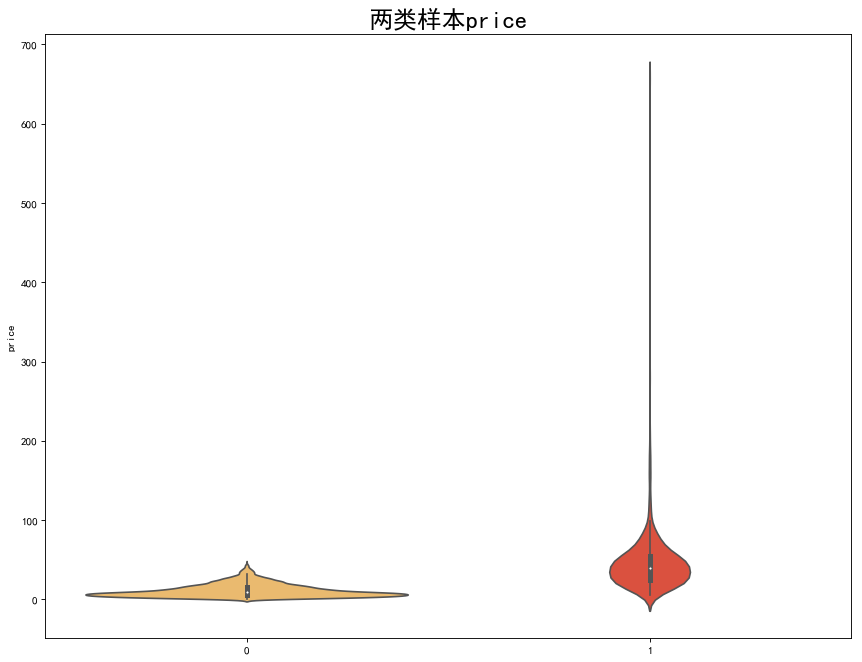

In [25]:
#price也有明显差异

plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x=y_pred,y=df_all["price"],palette=sns.color_palette("YlOrRd",2))

# Decoration
plt.title('两类样本price', fontsize=22)

plt.show()

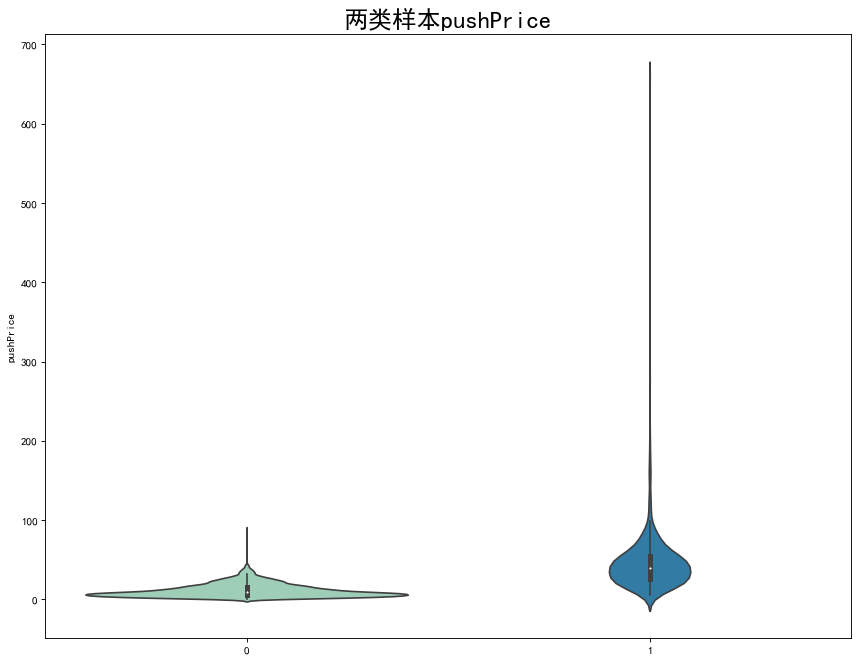

In [26]:
#Push_price也有明显差异

plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x=y_pred,y=df_all["pushPrice"],palette=sns.color_palette("YlGnBu",2))

# Decoration
plt.title('两类样本pushPrice', fontsize=22)

plt.show()

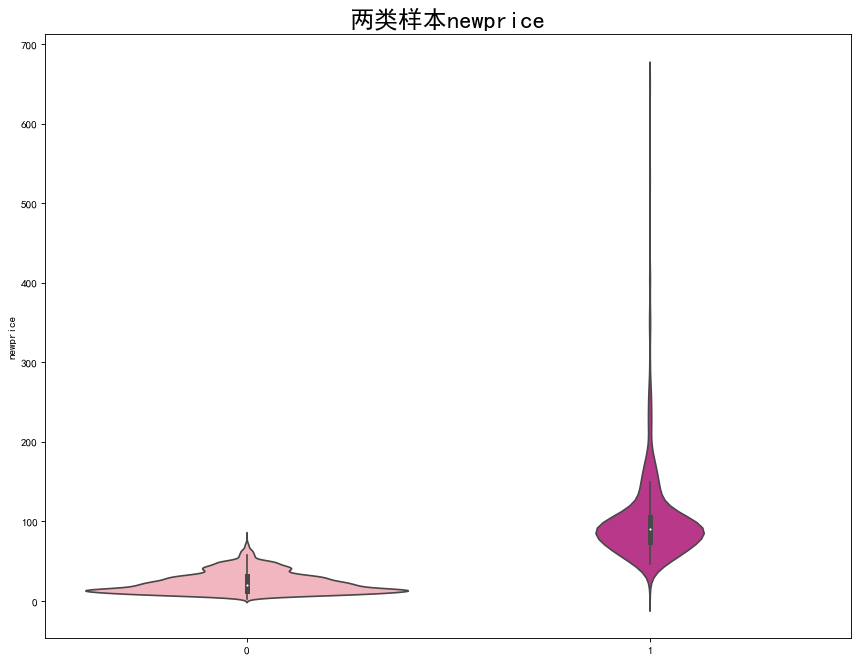

In [27]:


plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x=y_pred,y=df_all["newprice"],palette=sns.color_palette("RdPu",2))

# Decoration
plt.title('两类样本newprice', fontsize=22)

plt.show()

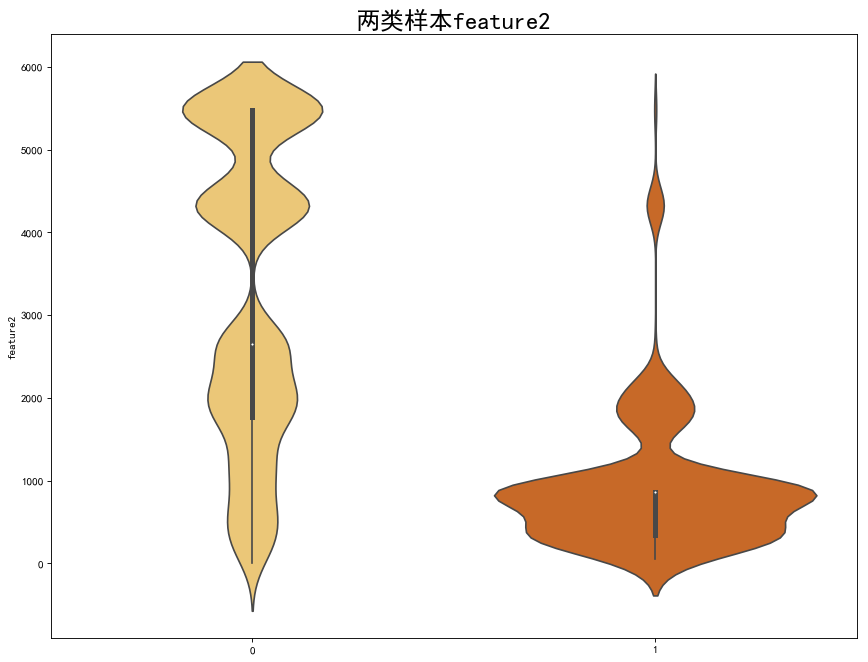

In [28]:

plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x=y_pred,y=df_all["feature2"],palette=sns.color_palette("YlOrBr",2))

# Decoration
plt.title('两类样本feature2', fontsize=22)

plt.show()